In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('Lab7_Part1.csv')
data = pd.DataFrame(data).to_numpy()
time = data[1080:1645,0]
force = data[1080:1645,1]
position = data[1080:1645,2]


In [3]:
def f_lin(x, m, c):
    return m * x + c


In [4]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, position - position[0], force)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

print("m = %5.4f \u00b1 %5.4f" % (m, dm))
print("b = %5.4f \u00b1 %5.4f" % (b, db))

m = -12.7806 ± 0.0054
b = -0.3775 ± 0.0008


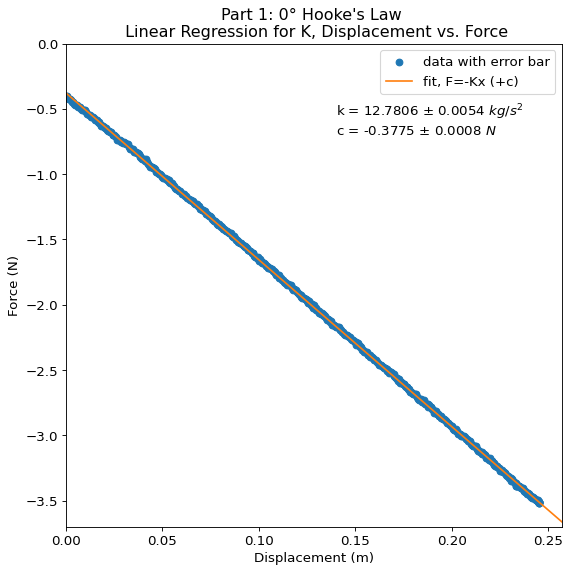

In [5]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(position - position[0], force, label="data with error bar")
plt.errorbar(np.linspace(0,10), f_lin(np.linspace(0,10), m, b), label='fit, F=-Kx (+c)', color='tab:orange')

plt.title("Part 1: 0° Hooke's Law \n Linear Regression for K, Displacement vs. Force")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")

plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
plt.xlim(0,.257)
plt.ylim(-3.7,0)
plt.legend()
plt.show()

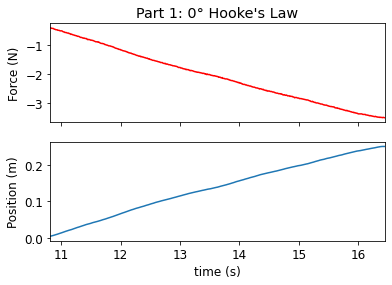

In [6]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(min(time), max(time))
axarr[0].plot(time, force,'r')
axarr[0].set_title("Part 1: 0° Hooke's Law")
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(time, position)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('Position (m)')
plt.show()